## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [67]:
pip freeze

absl-py==2.0.0
aiobotocore @ file:///C:/b/abs_1c1a_vjay2/croot/aiobotocore_1682537737724/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/b/abs_b78zt6vo64/croot/aiohttp_1694181126607/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///C:/b/abs_f4tsjyl9va/croot/anaconda-anon-usage_1695310457827/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client @ file:///C:/b/abs_80wttmgui4/croot/anaconda-client_1694625288614/work
anaconda-cloud-auth @ file:///C:/b/abs_5cjpnu6wjb/croot/anaconda-cloud-auth_1694462130037/work
anaconda-navigator @ file:///C:/b/abs_ab00e0_u7e/croot/anaconda-navigator_1695238210954/work
anaconda-project

In [68]:
#Importemos TensorFlow 2.X y Numpy
# TensorFlow 2.X embebe Keras, por lo que no es necesario importarlo por separado
import numpy as np
import tensorflow as tf
tf.__version__

'2.14.0'

#### **- Cargando el conjunto de datos**

In [69]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist #Con este comando estamos cargando el dataset MNIST en la variable mnist. MNIST es un dataset de imagenes de numeros escritos a mano, este dataset esta disponible en Keras y es muy utilizado para probar algoritmos de Deep Learning
(x_train, y_train), (x_test, y_test) = mnist.load_data() #Cargamos los datos de entrenamiento y de testeo, el comando mnist.load_data() devuelve los datos de entrenamiento y de testeo en dos tuplas, la primera tupla contiene los datos de entrenamiento y la segunda tupla contiene los datos de testeo, cada tupla contiene dos arreglos, el primer arreglo contiene las imagenes y el segundo arreglo contiene las etiquetas de las imagenes
print(x_train.shape) #Imprimimos la forma de los datos de entrenamiento
print(y_train.shape) #Imprimimos la forma de los datos de testeo
print(x_test.shape) #Imprimimos la forma de los datos de entrenamiento
print(y_test.shape)    #Imprimimos la forma de los datos de testeo

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Inspeccionando el conjunto de datos**

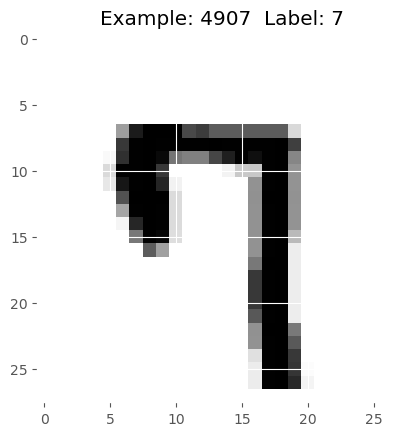

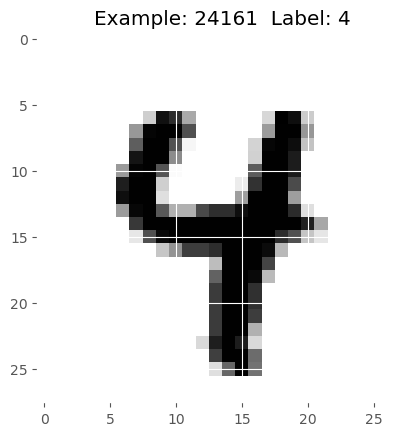

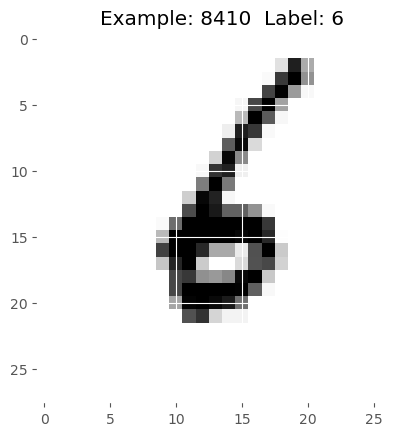

In [70]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:]
  # Seleccionar el target num de mnist.train.labels
  label = y_train[num]
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [71]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(60000, 10)
(54000, 10)


In [72]:
print(y_tr[5214])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [73]:
print(y_tr[5214].argmax(axis=0))

4


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [74]:
# Voy a necesitar importar una serie de modulos para programar mi red neuronal
from tensorflow.keras.models import Sequential  # Para crear modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense, Flatten # Para crear capas densas y capas de aplanamiento
# Vamos a codificar la topología de nuestra primera red neuronal!!!
model = Sequential() #Creo un modelo secuencial con Keras usando una variable vacia llamada model. Esto genera una estructura de tipo arbol donde se pueden ir agregando capas de manera secuencial
model.add(Flatten(input_shape=(28,28))) #Agrego la primera capa de aplanamiento a mi modelo. Esta capa no tiene parametros, solo transforma la imagen de 28x28 a un vector de 784 elementos
model.add(Dense(512, input_shape=(28*28,), activation="relu")) #Agrego la segunda capa de 512 neuronas con activación relu. Esta capa tiene 401920 parametros (784*512 + 512)
model.add(Dense(10, activation="softmax")) #Capa salida -> Mismo número de neuronas que de clases objetivo

# Ahí tenemos nuestro primer MLP con una única capa oculta de 512 neuronas

In [75]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# Ahora que tengo definida la arquitectura, la compilo
model.compile(loss="categorical_crossentropy", optimizer=SGD(0.005), metrics=["accuracy"])

In [76]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [77]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...") #Imprimo en pantalla que voy a entrenar mi red neuronal
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128) #Entreno mi red neuronal con los datos de entrenamiento y de validación, durante 50 épocas, con un tamaño de batch de 128

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 2s 4ms/step - loss: 1.4670 - accuracy: 0.6864 - val_loss: 0.9633 - val_accuracy: 0.8167
Epoch 2/50
422/422 [==============================] - 1s 3ms/step - loss: 0.7694 - accuracy: 0.8444 - val_loss: 0.6480 - val_accuracy: 0.8573
Epoch 3/50
422/422 [==============================] - 1s 3ms/step - loss: 0.5786 - accuracy: 0.8666 - val_loss: 0.5296 - val_accuracy: 0.8757
Epoch 4/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4949 - accuracy: 0.8783 - val_loss: 0.4683 - val_accuracy: 0.8845
Epoch 5/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.8864 - val_loss: 0.4294 - val_accuracy: 0.8898
Epoch 6/50
422/422 [==============================] - 1s 3ms/step - loss: 0.4156 - accuracy: 0.8917 - val_loss: 0.4021 - val_accuracy: 0.8938
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.3927 - accuracy: 0.8962 - val_loss: 0

#### **- Observando el proceso de entrenamiento para tomar decisiones**

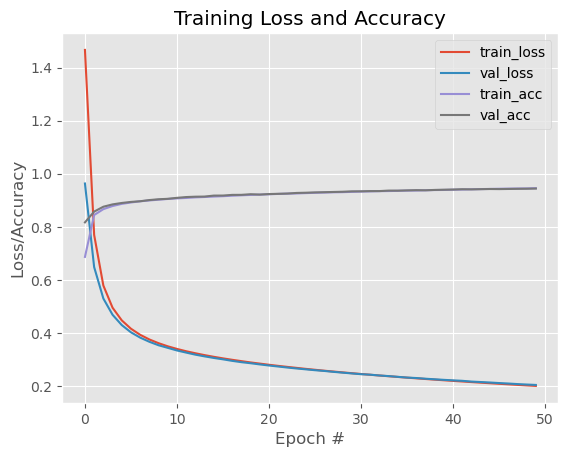

In [78]:
# Muestro gráfica de accuracy y losses, siempre que hagamos un modelo de deep learning, debemos plotear estas gráficas para ver si el modelo esta aprendiendo o no
plt.style.use("ggplot") #Estilo de la gráfica
plt.figure() #Creo una figura
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss") #Grafico la pérdida de entrenamiento
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss") #Grafico la pérdida de validación
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc") #Grafico la precisión de entrenamiento
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc") #Grafico la precisión de validación
plt.title("Training Loss and Accuracy") #Titulo de la gráfica
plt.xlabel("Epoch #") #Etiqueta del eje x
plt.ylabel("Loss/Accuracy") #Etiqueta del eje y
plt.legend() #Muestro la leyenda

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [79]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
#print(y_te[0])
#print(predictions[0])
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...


79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.92      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.93      0.93       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [80]:
predictions[0].argmax(axis=0)

7

In [81]:
y_te[0].argmax(axis=0)

7

In [82]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [83]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


#### **- Inspeccionando el conjunto de datos**

In [84]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5]]
)
decoded

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

#### **- Acondicionando el conjunto de datos**

In [85]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data): #Función auxiliar para hacer one-hot encoding de los datos de entrada
    encoded = np.zeros((len(data),WORD_LIMIT)) #Creo un arreglo de ceros de tamaño len(data) x WORD_LIMIT
    for i, v in enumerate(data): #Itero sobre los datos de entrada
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded #Devuelvo el arreglo de one-hot encoding

In [86]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data) #Aplico one-hot encoding a los datos de entrenamiento 
x_test = one_hot_encode(testing_data)   #Aplico one-hot encoding a los datos de testeo
print(x_train.shape)    #Imprimo la forma de los datos de entrenamiento (tamaño de la matriz)
print(x_test.shape)    #Imprimo la forma de los datos de testeo (tamaño de la matriz)

(8982, 10000)
(2246, 10000)


In [87]:
print(x_test[3])    #Imprimo el one-hot encoding de la cuarta noticia de testeo

[0. 1. 1. ... 0. 0. 0.]


In [88]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
from tensorflow.keras.utils import to_categorical #Importo la función to_categorical de Keras
y_train = to_categorical(training_labels) #Aplico one-hot encoding a los labels de entrenamiento
y_test = to_categorical(testing_labels) #Aplico one-hot encoding a los labels de testeo
print(y_train.shape)    #Imprimo la forma de los labels de entrenamiento (tamaño de la matriz)
print(y_test.shape)   #Imprimo la forma de los labels de testeo (tamaño de la matriz)

(8982, 46)
(2246, 46)


In [89]:
print(y_test[3])   #Imprimo el one-hot encoding del label de la cuarta noticia de testeo

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [90]:
from tensorflow.keras.models import Sequential # Para crear modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense # Para crear capas densas
# Vamos a codificar la topología de nuestro MLP
model = Sequential() #Creo un modelo secuencial con Keras usando una variable vacia llamada model. Esto genera una estructura de tipo arbol donde se pueden ir agregando capas de manera secuencial
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,))) #Agrego la primera capa de 128 neuronas con activación relu. Esta capa tiene 128*10000 + 128 = 128128 parametros
model.add(Dense(64,activation='relu')) #Agrego la segunda capa de 64 neuronas con activación relu. Esta capa tiene 8256 parametros
model.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [91]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam', #Optimizador Adam -> Ideal para clasificación multiclase
               loss='categorical_crossentropy', # Función de pérdida categorical_crossentropy 
               metrics=['accuracy']) #Métrica de precisión 

In [92]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 10ms/step - loss: 1.5198 - accuracy: 0.6693 - val_loss: 1.0296 - val_accuracy: 0.7785
Epoch 2/20
225/225 [==============================] - 2s 8ms/step - loss: 0.6011 - accuracy: 0.8678 - val_loss: 0.8630 - val_accuracy: 0.8175
Epoch 3/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2888 - accuracy: 0.9379 - val_loss: 0.9250 - val_accuracy: 0.8058
Epoch 4/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2013 - accuracy: 0.9549 - val_loss: 0.9371 - val_accuracy: 0.8030
Epoch 5/20
225/225 [==============================] - 2s 9ms/step - loss: 0.1686 - accuracy: 0.9566 - val_loss: 0.9261 - val_accuracy: 0.8114
Epoch 6/20
225/225 [==============================] - 2s 9ms/step - loss: 0.1433 - accuracy: 0.9585 - val_loss: 0.9903 - val_accuracy: 0.8058
Epoch 7/20
225/225 [==============================] - 2s 9ms/step - loss: 0.1319 - accuracy: 0.9589 - val_loss: 1.0227 - val_accuracy: 0.7908
Epoch

#### **- Observando el proceso de entrenamiento para tomar decisiones**

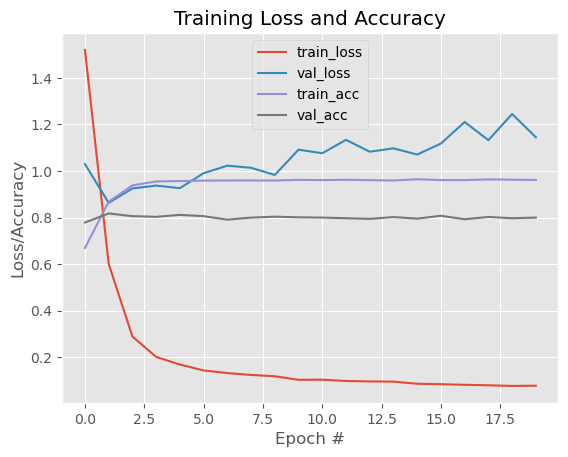

In [93]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot") 
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [94]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...") #Imprimo en pantalla que voy a evaluar mi red neuronal
model.predict(x_test) #Predigo las clases de las imágenes de testeo
loss, accuracy = model.evaluate(x_test, y_test) #Evalúo el modelo con los datos de testeo
print('Loss {}, accuracy {}'.format(loss,accuracy)) #Imprimo la pérdida y la precisión del modelo

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.2391 - accuracy: 0.7858
Loss 1.239139199256897, accuracy 0.7858415246009827


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [95]:
from tensorflow.keras.models import Sequential # Para crear modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense # Para crear capas densas 
from tensorflow.keras import regularizers # Para regularización L2
# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential() #Creo un modelo secuencial con Keras usando una variable vacia llamada model. Esto genera una estructura de tipo arbol donde se pueden ir agregando capas de manera secuencial
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(WORD_LIMIT,))) #Agrego la primera capa de 128 neuronas con activación relu. Esta capa tiene 128*10000 + 128 = 128128 parametros
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Agrego la segunda capa de 64 neuronas con activación relu. Esta capa tiene 8256 parametros
model_reg.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [96]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam', 
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [97]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 10ms/step - loss: 2.4005 - accuracy: 0.6490 - val_loss: 1.7993 - val_accuracy: 0.7112
Epoch 2/20
225/225 [==============================] - 2s 10ms/step - loss: 1.7052 - accuracy: 0.7354 - val_loss: 1.6781 - val_accuracy: 0.7373
Epoch 3/20
225/225 [==============================] - 2s 10ms/step - loss: 1.5961 - accuracy: 0.7530 - val_loss: 1.6336 - val_accuracy: 0.7457
Epoch 4/20
225/225 [==============================] - 2s 10ms/step - loss: 1.5363 - accuracy: 0.7663 - val_loss: 1.5927 - val_accuracy: 0.7652
Epoch 5/20
225/225 [==============================] - 2s 10ms/step - loss: 1.5000 - accuracy: 0.7752 - val_loss: 1.5940 - val_accuracy: 0.7540
Epoch 6/20
225/225 [==============================] - 2s 10ms/step - loss: 1.4731 - accuracy: 0.7805 - val_loss: 1.5896 - val_accuracy: 0.7635
Epoch 7/20
225/225 [==============================] - 2s 10ms/step - loss: 1.4425 - accuracy: 0.7861 - val_loss: 1.5930 - val_accuracy: 0.7618

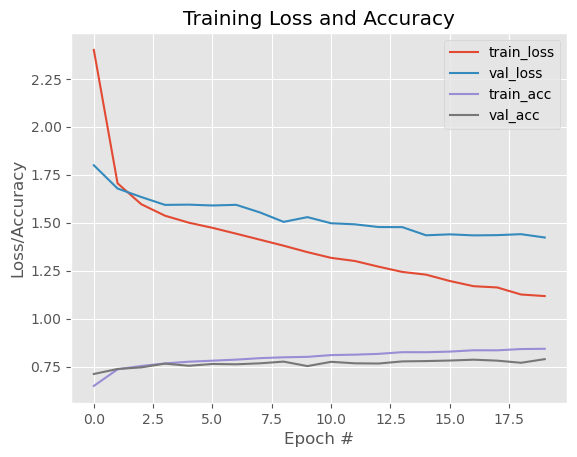

In [98]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [99]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...") #Imprimo en pantalla que voy a evaluar mi red neuronal
model_reg.predict(x_test) #Predigo las clases de las imágenes de testeo
loss, accuracy = model_reg.evaluate(x_test, y_test) #Evalúo el modelo con los datos de testeo
print('Loss {}, accuracy {}'.format(loss,accuracy)) #Imprimo la pérdida y la precisión del modelo

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 2ms/step - loss: 1.4650 - accuracy: 0.7654
Loss 1.4649873971939087, accuracy 0.7653606534004211


#### **- Dropout**

In [100]:
from tensorflow.keras.models import Sequential # Para crear modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense, Dropout # Para crear capas densas y capas de dropout 
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential() #Creo un modelo secuencial con Keras usando una variable vacia llamada model. Esto genera una estructura de tipo arbol donde se pueden ir agregando capas de manera secuencial
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,))) #Agrego la primera capa de 128 neuronas con activación relu. Esta capa tiene 128*10000 + 128 = 128128 parametros
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75)) #Agrego una capa de dropout con probabilidad de dropout de 0.75 
model_drop.add(Dense(64,activation='relu')) #Agrego la segunda capa de 64 neuronas con activación relu. Esta capa tiene 8256 parametros
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75)) #Agrego otra capa de dropout con probabilidad de dropout de 0.75
model_drop.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [101]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [102]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 10ms/step - loss: 2.4996 - accuracy: 0.3957 - val_loss: 1.6511 - val_accuracy: 0.5804
Epoch 2/20
225/225 [==============================] - 2s 9ms/step - loss: 1.8286 - accuracy: 0.5477 - val_loss: 1.4862 - val_accuracy: 0.6811
Epoch 3/20
225/225 [==============================] - 2s 9ms/step - loss: 1.6776 - accuracy: 0.5947 - val_loss: 1.4064 - val_accuracy: 0.6989
Epoch 4/20
225/225 [==============================] - 2s 9ms/step - loss: 1.5692 - accuracy: 0.6263 - val_loss: 1.3287 - val_accuracy: 0.7112
Epoch 5/20
225/225 [==============================] - 2s 9ms/step - loss: 1.4538 - accuracy: 0.6397 - val_loss: 1.2984 - val_accuracy: 0.7173
Epoch 6/20
225/225 [==============================] - 2s 9ms/step - loss: 1.4326 - accuracy: 0.6564 - val_loss: 1.2839 - val_accuracy: 0.7195
Epoch 7/20
225/225 [==============================] - 2s 9ms/step - loss: 1.3673 - accuracy: 0.6697 - val_loss: 1.2673 - val_accuracy: 0.7257
Epoch

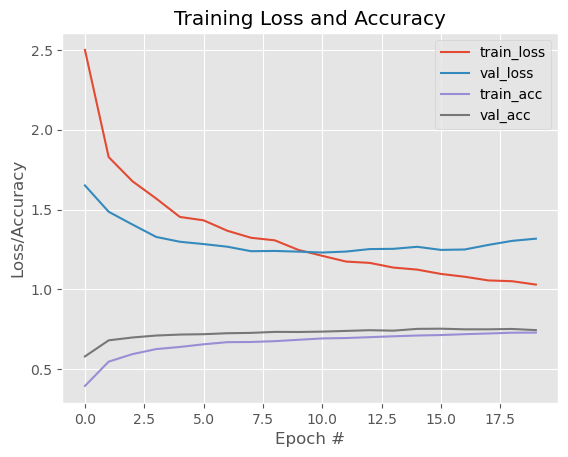

In [103]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss") 
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# ¿Y si desconectamos mayor porcentaje de neuronas?

In [104]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_drop.predict(x_test) #Predigo las clases de las imágenes de testeo
loss, accuracy = model_drop.evaluate(x_test, y_test) #Evalúo el modelo con los datos de testeo
print('Loss {}, accuracy {}'.format(loss,accuracy)) #Imprimo la pérdida y la precisión del modelo

[INFO]: Evaluando red neuronal...


71/71 [==============================] - 0s 2ms/step - loss: 1.4568 - accuracy: 0.7320
Loss 1.4567898511886597, accuracy 0.7319679260253906


#### **- Batch Normalization**

In [105]:
from tensorflow.keras.models import Sequential # Para crear modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense, BatchNormalization # Para crear capas densas y capas de normalización
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential() #Creo un modelo secuencial con Keras usando una variable vacia llamada model. Esto genera una estructura de tipo arbol donde se pueden ir agregando capas de manera secuencial
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,))) #Agrego la primera capa de 128 neuronas con activación relu. Esta capa tiene 128*10000 + 128 = 128128 parametros
model_bn.add(BatchNormalization()) #Agrego una capa de normalización
model_bn.add(Dropout(0.75)) #Agrego una capa de dropout con probabilidad de dropout de 0.75
model_bn.add(Dense(64,activation='relu')) #Agrego la segunda capa de 64 neuronas con activación relu. Esta capa tiene 8256 parametros
model_bn.add(BatchNormalization()) #Agrego otra capa de normalización
model_bn.add(Dropout(0.75)) #Agrego otra capa de dropout con probabilidad de dropout de 0.75
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [106]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [107]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 11ms/step - loss: 3.3657 - accuracy: 0.3232 - val_loss: 1.8200 - val_accuracy: 0.6394
Epoch 2/20
225/225 [==============================] - 2s 10ms/step - loss: 2.0904 - accuracy: 0.5585 - val_loss: 1.4472 - val_accuracy: 0.6861
Epoch 3/20
225/225 [==============================] - 2s 10ms/step - loss: 1.8114 - accuracy: 0.6011 - val_loss: 1.3608 - val_accuracy: 0.6900
Epoch 4/20
225/225 [==============================] - 2s 10ms/step - loss: 1.6352 - accuracy: 0.6266 - val_loss: 1.2903 - val_accuracy: 0.7034
Epoch 5/20
225/225 [==============================] - 2s 10ms/step - loss: 1.5309 - accuracy: 0.6505 - val_loss: 1.2422 - val_accuracy: 0.7156
Epoch 6/20
225/225 [==============================] - 2s 10ms/step - loss: 1.4424 - accuracy: 0.6639 - val_loss: 1.2075 - val_accuracy: 0.7212
Epoch 7/20
225/225 [==============================] - 2s 10ms/step - loss: 1.3712 - accuracy: 0.6792 - val_loss: 1.1686 - val_accuracy: 0.7295

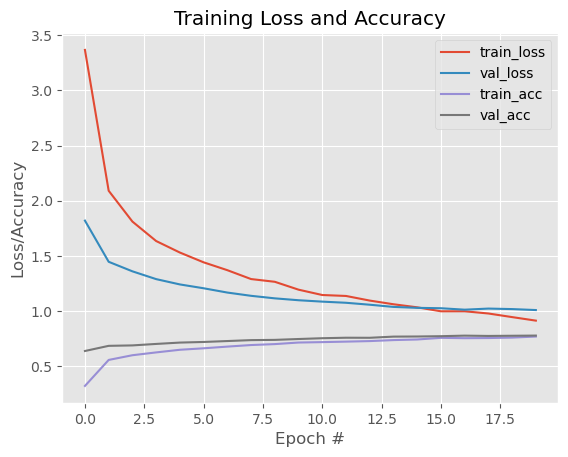

In [108]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [109]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...") #Imprimo en pantalla que voy a evaluar mi red neuronal
model_bn.predict(x_test) #Predigo las clases de las imágenes de testeo
loss, accuracy = model_bn.evaluate(x_test, y_test) #Evalúo el modelo con los datos de testeo
print('Loss {}, accuracy {}'.format(loss,accuracy)) #Imprimo la pérdida y la precisión del modelo-

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.0414 - accuracy: 0.7667
Loss 1.0413929224014282, accuracy 0.7666963338851929
